In [1]:
## Import Library's
import yfinance as yf
import pandas as pd
import numpy as np
# import plotly.express as px
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

## Step's to folow


1.   Pull the stock price data
3.   Calculate following 
*   Log Daily Return
*   Variance
*   Volatility
*   Covariance
*   Correlation
*   Expected Returns
*   Weights
*   Portfolio Variance
*   Portfolio expected returns

4.   Building an optimal risky portfolio










In [6]:
#### list of All Important index in india

indian_index_symbols = {
    "Nifty 50": "^NSEI",
    "BSE Sensex": "^BSESN",
    "Nifty Bank": "^NSEBANK",
    "Nifty Midcap 100": "^NIFTYMID50",
    "Nifty Smallcap 100": "^CNXSMALL",
    "Nifty IT": "^CNXIT",
    "Nifty Pharma": "^CNXPHARMA",
    "Nifty FMCG": "^CNXFMCG",
    "Nifty Metal": "^CNXMETAL",
    "Nifty Energy": "^CNXENERGY",
    "Nifty Auto": "^CNXAUTO",
    "Nifty Realty": "^CNXREALTY",
    "Nifty PSU Bank": "^CNXPSU",
    "Nifty Infrastructure": "^CNXINFRA"
}

In [46]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
index_links = {
    "Nifty 50": "https://en.wikipedia.org/wiki/NIFTY_50#Constituent_stocks",
    "Sensex": "https://en.wikipedia.org/wiki/BSE_SENSEX#Constituent_companies",
    "Nifty Bank": "https://en.wikipedia.org/wiki/NIFTY_Bank#Constituent_companies",
    "Nifty IT": "https://en.wikipedia.org/wiki/NIFTY_IT#Constituents",
    "Nifty Pharma": "https://en.wikipedia.org/wiki/NIFTY_Pharma#Constituents",
    "Nifty Auto": "https://en.wikipedia.org/wiki/NIFTY_Auto#Constituents"
}








## 1) Pull the stock price data

In [3]:


def download_sp500_stock_list():
    """
    Download the list of stocks in the S&P 500 index.

    Returns:
    --------
    sp500_stocks : list
        A list of stock tickers in the S&P 500 index.
    """

    # Download S&P 500 component stocks from Yahoo Finance
    sp500_data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    sp500_table = sp500_data[0]
    sp500_stocks = sp500_table['Symbol'].tolist()

    return sp500_stocks

def download_nifty50_stock_list():
    ## Wikipedia Link to Extract Data for Nifty 50
    url = 'https://en.wikipedia.org/wiki/NIFTY_50#Constituent_stocks'
    ## Selecting Table from URL
    stock_table = pd.read_html(url)[2]
    ## Adding .NS TO Nifty 50['SymbolS']
    stock_symbols = stock_table['Symbol']+ '.NS'
    ## Converting and Assigning in list formate to stock_symbol 
    stock_symbols = stock_symbols.tolist()
    return stock_symbols


def create_random_portfolio(list_stocks, start_date, end_date, max_portfolio_value=100000):
    """
    Create a random portfolio of stocks if list of stock is given .
    The portfolio will not contain any null values in any column for the selected stocks.
    The allocation of shares to each asset will be random, with the total value of the portfolio not exceeding the specified maximum.

    Parameters:
    -----------
    sp500_stocks : list
        A list of stock tickers in the S&P 500 index.

    start_date : str
        The start date of the portfolio.

    end_date : str
        The end date of the portfolio.

    max_portfolio_value : float, optional (default=100000)
        The maximum value of the portfolio.

    Returns:
    --------
    portfolio : pandas.DataFrame
        A DataFrame containing the selected stocks and the allocated number of shares for each stock.
    """

    # Select a random number of stocks from the Stock List list
    num_stocks = np.random.randint(4,10)
    selected_stocks = np.random.choice(list_stocks, size=num_stocks, replace=False)

    # Download stock data for the selected stocks
    stock_data = yf.download(list(selected_stocks), start=start_date, end=end_date)['Adj Close']

    # Remove stocks with any null values
    stock_data = stock_data.dropna(axis=1)

    # Get the list of valid stock tickers
    valid_tickers = stock_data.columns.tolist()

    # Generate random allocations
    allocations = np.random.random(len(valid_tickers))
    allocations /= np.sum(allocations)

    # Calculate the maximum number of shares for each stock to limit the total portfolio value
    stock_prices = stock_data.iloc[0]  # Use the end date prices
    max_shares = (max_portfolio_value * allocations) // stock_prices
    max_shares = max_shares.astype(int)

    # Create the portfolio DataFrame
    portfolio = pd.DataFrame({'Symbol': valid_tickers,
                              'Shares': np.random.randint(1, max_shares + 1)}
                             )

    return stock_data,portfolio


In [18]:
stock_list = download_nifty50_stock_list()
import numpy as np

start_date = '2005-01-04'
end_date = '2010-12-03'

# start_date = '2007-09-17'
# end_date = '2023-05-16'

stock_data,portfolio = create_random_portfolio(stock_list, start_date, end_date, max_portfolio_value=100000)


[*********************100%***********************]  5 of 5 completed

1 Failed download:
- SBILIFE.NS: Data doesn't exist for startDate = 1104777000, endDate = 1291314600


In [19]:
portfolio

,Symbol,Shares
0,BHARTIARTL.NS,58
1,GRASIM.NS,42
2,WIPRO.NS,256


In [20]:
stock_data

,BHARTIARTL.NS,GRASIM.NS,WIPRO.NS
Date,,,
2005-01-04,97.303230,171.638443,70.158958
2005-01-05,90.525131,166.716751,66.248489
2005-01-06,90.890930,165.891159,64.571899
2005-01-07,90.439056,165.801514,65.541336
2005-01-10,87.598717,162.550278,63.504150
...,...,...,...
2010-11-26,288.896484,320.066040,135.008972
2010-11-29,293.137268,320.172760,138.404922
2010-11-30,311.701752,323.816010,139.017853


In [21]:
## Download Data releateed to Portfolio 
# portfolio.to_csv('Portfolio_Allocation_Data.csv',index=False)
# stock_data.to_csv('stock_hist_data.csv',index=False)

In [22]:
# # Download the S&P 500 stock list
# sp500_stocks = download_sp500_stock_list()

# # Specify the start and end dates for the portfolio
# start_date = '2005-01-04'
# end_date = '2010-12-03'

# # Create a random portfolio
# stock_data,portfolio = create_random_portfolio(sp500_stocks, start_date, end_date, max_portfolio_value=100000)



In [23]:
### Benchmark Return
# benchmark = yf.download('^GSPC',start=start_date,end=end_date)['Adj Close']
benchmark = yf.download('^NSEI',start=start_date,end=end_date)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [24]:
## Todownload Data For Nifty 50
# benchmark.reset_index().to_csv('nifth_50_data.csv',index=False)

In [25]:
### Initial Portfolio
initial_portfolio = portfolio.copy()
initial_portfolio['Price'] = stock_data.iloc[0].values
## Final Portfolio
# final_portfolio = portfolio.copy()
# initial_portfolio['Price'] = stock_data.iloc[-1].values


In [26]:
initial_portfolio

,Symbol,Shares,Price
0,BHARTIARTL.NS,58,97.303230
1,GRASIM.NS,42,171.638443
2,WIPRO.NS,256,70.158958


In [27]:
def calculate_asset_composition(portfolio,values):
    """
    Calculate the weight of each stock in the portfolio.

    Parameters:
    -----------
    portfolio : pandas.DataFrame
        DataFrame containing Symbol, Price, and Shares.
    value : 

    Returns:
    --------
    weights : pandas.DataFrame
        DataFrame containing stock symbols and their corresponding weights.
    """
    ## Add Price Coloum to portfolio 
    portfolio['Price'] = values
    # Calculate the value of each stock (price * shares)
    portfolio['Value'] = portfolio['Price'] * portfolio['Shares']

    # Calculate the total portfolio value
    total_value = portfolio['Value'].sum()

    # Calculate the weight of each stock
    portfolio['Weight'] = portfolio['Value'] / total_value



    return portfolio

In [28]:
## Calculate initital Compossition of Assets 
initial_portfolio = calculate_asset_composition(portfolio.copy(),values=stock_data.iloc[0].values)
final_portfolio = calculate_asset_composition(portfolio.copy(),values=stock_data.iloc[-1].values)


In [29]:
initial_portfolio

,Symbol,Shares,Price,Value,Weight
0,BHARTIARTL.NS,58,97.303230,5643.587357,0.183155
1,GRASIM.NS,42,171.638443,7208.814606,0.233953
2,WIPRO.NS,256,70.158958,17960.693359,0.582892


In [30]:
final_portfolio

,Symbol,Shares,Price,Value,Weight
0,BHARTIARTL.NS,58,299.541840,17373.426697,0.257450
1,GRASIM.NS,42,332.703613,13973.551758,0.207069
2,WIPRO.NS,256,141.154800,36135.628906,0.535481


In [31]:
total_value = initial_portfolio.Value.sum()
total_value


30813.095321655273

## 2) Calculate following

### Log Return

In [183]:
data = stock_data.copy()

In [184]:
benchmark_log_return = benchmark.pct_change().apply(lambda x: np.log(1+x)).reset_index()
benchmark_log_return = benchmark_log_return.drop(index=0)
benchmark_log_return.head(2)

,Date,Adj Close
1,2007-09-18,0.011404
2,2007-09-19,0.040130


In [185]:
log_return = data.pct_change().apply(lambda x: np.log(1+x)).reset_index()
log_return = log_return.drop(index=0)
log_return.head(2)

,Date,ASIANPAINT.NS,HDFCBANK.NS,HINDUNILVR.NS,RELIANCE.NS,SUNPHARMA.NS,TATAMOTORS.NS,WIPRO.NS
1,2005-01-05,-0.006812,-0.038062,-0.012034,-0.002450,0.000000,-0.031463,-0.057351
2,2005-01-06,-0.039289,-0.030250,-0.018855,-0.007101,-0.036211,-0.021066,-0.025633


In [186]:
log_return

,Date,ASIANPAINT.NS,HDFCBANK.NS,HINDUNILVR.NS,RELIANCE.NS,SUNPHARMA.NS,TATAMOTORS.NS,WIPRO.NS
1,2005-01-05,-0.006812,-0.038062,-0.012034,-0.002450,0.000000,-0.031463,-0.057351
2,2005-01-06,-0.039289,-0.030250,-0.018855,-0.007101,-0.036211,-0.021066,-0.025633
3,2005-01-07,0.033681,0.010458,-0.005656,0.030045,-0.012466,-0.000913,0.014901
4,2005-01-10,0.005453,-0.001020,0.011980,-0.015050,-0.009727,-0.036687,-0.031576
5,2005-01-11,-0.004672,-0.013051,-0.011271,-0.015851,-0.052418,0.010784,-0.003102
...,...,...,...,...,...,...,...,...
1458,2010-11-26,0.010773,-0.010885,-0.013892,-0.017664,-0.017218,-0.033178,0.003073
1459,2010-11-29,0.014825,0.000000,0.015908,0.036776,0.007924,0.016621,0.024842
1460,2010-11-30,0.024129,-0.005454,0.001510,-0.012903,-0.005015,0.040444,0.004419
1461,2010-12-01,0.011821,0.035103,-0.002181,0.003242,0.002455,0.041089,-0.011746


### Variance

In [187]:
data_var = log_return.iloc[:,1:].var()
data_var

ASIANPAINT.NS    0.000362
HDFCBANK.NS      0.000580
HINDUNILVR.NS    0.000437
RELIANCE.NS      0.001329
SUNPHARMA.NS     0.000466
TATAMOTORS.NS    0.000931
WIPRO.NS         0.000657
dtype: float64

### Volatility

In [188]:
np.std(log_return) * np.sqrt(250 )


Date             9887 days 03:02:43.949210240
ASIANPAINT.NS                        0.300921
HDFCBANK.NS                          0.380747
HINDUNILVR.NS                        0.330556
RELIANCE.NS                          0.576124
SUNPHARMA.NS                         0.341042
TATAMOTORS.NS                        0.482401
WIPRO.NS                             0.405035
dtype: object

In [191]:
## Yearly Volatile
data_volatile = np.sqrt(data_var * 250)
data_volatile

ASIANPAINT.NS    0.301024
HDFCBANK.NS      0.380877
HINDUNILVR.NS    0.330669
RELIANCE.NS      0.576321
SUNPHARMA.NS     0.341158
TATAMOTORS.NS    0.482566
WIPRO.NS         0.405174
dtype: float64

### Covariance

In [21]:
data_cov = log_return.iloc[:,1:].cov()
data_cov

,APOLLOHOSP.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BHARTIARTL.NS,HINDUNILVR.NS,MARUTI.NS,SBIN.NS,TITAN.NS
APOLLOHOSP.NS,0.000562,0.000199,0.000117,0.000114,0.000104,0.000111,0.000153,0.000202
AXISBANK.NS,0.000199,0.000981,0.000285,0.000301,0.000201,0.000279,0.000462,0.000376
BAJAJ-AUTO.NS,0.000117,0.000285,0.000828,0.000196,0.000177,0.000251,0.000239,0.000276
BHARTIARTL.NS,0.000114,0.000301,0.000196,0.000686,0.000165,0.000241,0.000286,0.000238
HINDUNILVR.NS,0.000104,0.000201,0.000177,0.000165,0.000437,0.000188,0.000185,0.000200
MARUTI.NS,0.000111,0.000279,0.000251,0.000241,0.000188,0.000584,0.000315,0.000291
SBIN.NS,0.000153,0.000462,0.000239,0.000286,0.000185,0.000315,0.000670,0.000333
TITAN.NS,0.000202,0.000376,0.000276,0.000238,0.000200,0.000291,0.000333,0.001028


### Correlation

In [22]:
data_corr = log_return.iloc[:,1:].corr()
data_corr

,APOLLOHOSP.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BHARTIARTL.NS,HINDUNILVR.NS,MARUTI.NS,SBIN.NS,TITAN.NS
APOLLOHOSP.NS,1.000000,0.268146,0.170760,0.183647,0.209291,0.193372,0.249235,0.265409
AXISBANK.NS,0.268146,1.000000,0.315801,0.366510,0.307127,0.369161,0.570202,0.373998
BAJAJ-AUTO.NS,0.170760,0.315801,1.000000,0.260346,0.294850,0.361580,0.321520,0.299180
BHARTIARTL.NS,0.183647,0.366510,0.260346,1.000000,0.302008,0.381483,0.422112,0.283895
HINDUNILVR.NS,0.209291,0.307127,0.294850,0.302008,1.000000,0.371805,0.341583,0.298177
MARUTI.NS,0.193372,0.369161,0.361580,0.381483,0.371805,1.000000,0.502978,0.375318
SBIN.NS,0.249235,0.570202,0.321520,0.422112,0.341583,0.502978,1.000000,0.401751
TITAN.NS,0.265409,0.373998,0.299180,0.283895,0.298177,0.375318,0.401751,1.000000


### Weights

In [23]:
# Define weights for allocation
# weight = [0.25, 0.25,0.25,0.25]
weight = initial_portfolio.Weight.values
data_mean_return = log_return.iloc[:,1:].mean()
data_mean_return

APOLLOHOSP.NS    0.000970
AXISBANK.NS      0.001437
BAJAJ-AUTO.NS    0.001230
BHARTIARTL.NS    0.000769
HINDUNILVR.NS    0.000606
MARUTI.NS        0.000780
SBIN.NS          0.001171
TITAN.NS         0.002078
dtype: float64

### Expected Returns

In [24]:
# Total expected return
data_exp_return = (data_mean_return*weight).sum()
data_exp_return

0.0017509699420901717

### Portfolio Varriance

In [25]:
port_var = data_cov.mul(weight, axis=0).mul(weight, axis=1).sum().sum()
port_var

0.0006422199508191676

### Portfolio expected returns

In [26]:
data

,APOLLOHOSP.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BHARTIARTL.NS,HINDUNILVR.NS,MARUTI.NS,SBIN.NS,TITAN.NS
Date,,,,,,,,
2005-01-04,115.858101,32.834187,188.614929,97.303223,98.565842,407.851562,49.371273,8.432475
2005-01-05,112.271408,31.890877,181.675552,90.525139,97.386810,392.728027,46.906132,7.984556
2005-01-06,110.943047,32.046650,178.948166,90.890930,95.567764,383.847382,45.907154,7.875490
2005-01-07,112.559235,32.903423,182.943375,90.439072,95.028793,387.452454,46.769386,8.048284
2005-01-10,112.337830,33.249599,182.709778,87.598724,96.174095,372.680573,45.576698,8.126831
...,...,...,...,...,...,...,...,...
2010-11-26,437.838379,245.397537,1166.729248,288.896515,235.938217,1237.872925,252.791412,166.065125
2010-11-29,449.895477,245.065674,1151.867310,293.137268,239.721588,1273.234497,254.292542,171.186234
2010-11-30,453.725372,252.026199,1140.223633,311.701782,240.083832,1287.677856,264.222351,171.618423


In [140]:
data = stock_data.copy()

In [141]:
data.index = pd.to_datetime(data.index)

In [142]:
### individual Stock Yearly Return
stock_yearly_exp_return = data.resample('Y').last().pct_change().mean()
stock_yearly_exp_return


ASIANPAINT.NS    0.435511
HDFCBANK.NS      0.371450
HINDUNILVR.NS    0.118893
RELIANCE.NS      0.548411
SUNPHARMA.NS     0.323204
TATAMOTORS.NS    0.838017
WIPRO.NS         0.329391
dtype: float64

In [29]:
data

,APOLLOHOSP.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BHARTIARTL.NS,HINDUNILVR.NS,MARUTI.NS,SBIN.NS,TITAN.NS
Date,,,,,,,,
2005-01-04,115.858101,32.834187,188.614929,97.303223,98.565842,407.851562,49.371273,8.432475
2005-01-05,112.271408,31.890877,181.675552,90.525139,97.386810,392.728027,46.906132,7.984556
2005-01-06,110.943047,32.046650,178.948166,90.890930,95.567764,383.847382,45.907154,7.875490
2005-01-07,112.559235,32.903423,182.943375,90.439072,95.028793,387.452454,46.769386,8.048284
2005-01-10,112.337830,33.249599,182.709778,87.598724,96.174095,372.680573,45.576698,8.126831
...,...,...,...,...,...,...,...,...
2010-11-26,437.838379,245.397537,1166.729248,288.896515,235.938217,1237.872925,252.791412,166.065125
2010-11-29,449.895477,245.065674,1151.867310,293.137268,239.721588,1273.234497,254.292542,171.186234
2010-11-30,453.725372,252.026199,1140.223633,311.701782,240.083832,1287.677856,264.222351,171.618423


In [30]:
### Entire Portfolio Yearly Return 
port_yearly_exp_return = (weight*stock_yearly_exp_return).sum()
port_yearly_exp_return

0.4779626770284854

In [31]:
### Entire Portfolio Yearly volatile 
port_yearly_exp_volatile = (weight*data_volatile).sum()
port_yearly_exp_volatile

0.4714201216650636

In [32]:
### Assets Formation
assets = pd.concat([stock_yearly_exp_return, data_volatile], axis=1)
assets.columns = ['Returns', 'Volatility']

In [33]:
assets

,Returns,Volatility
APOLLOHOSP.NS,0.200877,0.374903
AXISBANK.NS,0.547282,0.495158
BAJAJ-AUTO.NS,0.806786,0.454964
BHARTIARTL.NS,0.219982,0.414140
HINDUNILVR.NS,0.118893,0.330670
MARUTI.NS,0.397184,0.382131
SBIN.NS,0.416065,0.409215
TITAN.NS,0.545044,0.506992


In [34]:
assets

,Returns,Volatility
APOLLOHOSP.NS,0.200877,0.374903
AXISBANK.NS,0.547282,0.495158
BAJAJ-AUTO.NS,0.806786,0.454964
BHARTIARTL.NS,0.219982,0.414140
HINDUNILVR.NS,0.118893,0.330670
MARUTI.NS,0.397184,0.382131
SBIN.NS,0.416065,0.409215
TITAN.NS,0.545044,0.506992


## New Class To CalCulate Kpis

In [32]:
class KPIs:
    def __init__(self, stock_data):
        self.stock_data = stock_data
    
    def calculate_log_return(self):
        close_prices = self.stock_data
        ### Calulate Logarithmic return of Stock historical Data 
        self.log_returns = np.log(close_prices / close_prices.shift(1)).reset_index()
        ### Drop First Row
        self.log_returns = self.log_returns.drop(index=0)
        return self.log_returns
    
    ### Function to Calculate Portfolio Return Volatile and Sharpe Ratio by giving the weights allocation
    def get_ret_vol_sr(self, weights):
        weights = np.array(weights)
        log_ret = self.log_returns.iloc[:,1:]
        ret = np.sum(np.mean(log_ret, axis=0) * weights) * 252
        vol = np.sqrt(np.dot(weights.T, np.dot(np.cov(log_ret, rowvar=False) * 252, weights)))
        sr = ret / vol
        return np.array([ret, vol, sr])

    def yearl_risk_return(self):
        data = self.stock_data.copy()
        ## Convert Data index = Date to -> Datetime Formate
        data.index = pd.to_datetime(data.index)
        ## Rearrange entire data by only Yeard
        stock_yearly_exp_return = data.resample('Y').last().pct_change().mean()
        ## Clculate Standar deviation of daily log return and multipy with sqrt(number of trading days) which qives us yearly stock volatile
        stock_yearly_volatile = np.std(self.log_returns.iloc[:,1:])  * np.sqrt(250 ) 
        ## Create a Data frame of assets returns and risk and entire portfolio return ans risk
        assets = pd.concat([stock_yearly_exp_return, stock_yearly_volatile], axis=1)
        assets.columns = ['Returns', 'Volatility']
        assets = assets
        return assets
    
    ### Function To Calculatee Historical Valus of Portfolio with respect to weight associated with it
    def calculate_portfolio_values(self,initial_portfolio,weight):
        hist_data = self.stock_data
        total_value = initial_portfolio.Value.sum()
        total_share = round((total_value * weight) / initial_portfolio.Price)
        portfolio_hist_value = (hist_data*total_share.values).sum(axis=1).reset_index().rename(columns={0:'Portfolio Value'})
        return portfolio_hist_value
        return assets

In [33]:
calculate_kpis = KPIs(stock_data=stock_data)
### Daily Log Calculation's
daily_log_return = calculate_kpis.calculate_log_return()

In [34]:
calculate_kpis.yearl_risk_return()

,Returns,Volatility
BHARTIARTL.NS,0.219982,0.413999
GRASIM.NS,0.346149,1.155645
WIPRO.NS,0.329391,0.405035


In [35]:
daily_log_return

,Date,BHARTIARTL.NS,GRASIM.NS,WIPRO.NS
1,2005-01-05,-0.072205,-0.029094,-0.057351
2,2005-01-06,0.004033,-0.004964,-0.025633
3,2005-01-07,-0.004984,-0.000541,0.014902
4,2005-01-10,-0.031910,-0.019804,-0.031576
5,2005-01-11,-0.022607,-0.020526,-0.003102
...,...,...,...,...
1458,2010-11-26,-0.003589,0.038342,0.003072
1459,2010-11-29,0.014573,0.000333,0.024842
1460,2010-11-30,0.061406,0.011315,0.004419
1461,2010-12-01,-0.027017,0.017643,-0.011747


## Optimize Portfolio


### With old Function 

In [36]:
from scipy.optimize import minimize

class PortfolioOptimizer:
    def __init__(self, log_returns):
        self.log_returns = log_returns
    
    def get_ret_vol_sr(self, weights):
        weights = np.array(weights)
        ret = np.sum(np.mean(self.log_returns, axis=0) * weights) * 252
        vol = np.sqrt(np.dot(weights.T, np.dot(np.cov(self.log_returns, rowvar=False) * 252, weights)))
        sr = ret / vol
        return np.array([ret, vol, sr])
    
    def neg_sharpe(self, weights,log_returns):
        return self.get_ret_vol_sr(weights)[2] * -1
    
    def check_sum(self, weights):
        return np.sum(weights) - 1
    
    def optimize_portfolio(self, weights):
        cons = {'type': 'eq', 'fun': self.check_sum}
        bounds = [(0, 1) for _ in range(len(weights))]
        
        opt_results = minimize(self.neg_sharpe, weights, method='SLSQP', args=(self.log_returns,), bounds=bounds, constraints=cons)
        return opt_results

In [37]:
log_ret = daily_log_return.iloc[:,1:]
init_guess = initial_portfolio.Weight.values


optimizer = PortfolioOptimizer(log_ret)
opt_results = optimizer.optimize_portfolio(init_guess)

In [38]:
opt_results.x.round(2)

array([0.79, 0.  , 0.21])

### Compare Initital Weight And New Optimize Weight 


In [41]:
import numpy as np

def calculate_portfolio_returns(weights, asset_returns):
    # Calculate the portfolio returns
    portfolio_returns = np.dot(asset_returns, weights)

    return portfolio_returns


In [207]:
    # kpis = {
    #     'Expected Return': expected_return,
    #     'Sharpe Ratio': sharpe_ratio,
    #     'Portfolio Volatility': portfolio_volatility,
    #     'Efficient Frontier': efficient_frontier,
    #     'Allocation Changes': allocation_changes,
    #     'Turnover': turnover,
    #     'Historical Performance': historical_performance,
    #     'Tracking Error': tracking_error
    # }

In [42]:
optimize_weight = opt_results.x
original_weight = init_guess

In [43]:
### Portfolio Expected Return

stock_yearly_return_risk = calculate_kpis.yearl_risk_return()

In [44]:

def portfolio_yearly_expected_return(weight,yearly_return):
      '''
      Function Take Two Arguments 
              weight : list of all weight allocation of assets to entire portfolio value
              yearly_return : Yearly Retuns of Each Stock 
      '''
      exp_return = (weight*yearly_return).sum()
      return exp_return

def portfolio_yearly_risk(weight,yearly_risk):
      '''
      Function Take Two Arguments 
              weight : list of all weight allocation of assets to entire portfolio value
              yearly_return : Yearly Risk Associated with  Each of Stock 
      '''
      exp_risk = (weight*yearly_risk).sum()
      return exp_risk

def calculate_allocation_changes(initial_weights, optimized_weights):
    # Calculate the allocation changes
    allocation_changes = optimized_weights - initial_weights

    return allocation_changes

In [45]:
### Calculate Yearly Returns
original_portfolio_return = portfolio_yearly_expected_return(original_weight,stock_yearly_return_risk['Returns'])

### Calculate Yearly Risk
original_portfolio_risk = portfolio_yearly_risk(original_weight,stock_yearly_return_risk['Volatility'])


In [46]:
original_portfolio_return

0.313272944002525

In [47]:
original_portfolio_risk

0.5822841031509528

In [48]:
### Calculate Yearly Returns
optimize_portfolio_return = portfolio_yearly_expected_return(optimize_weight,stock_yearly_return_risk['Returns'])

### Calculate Yearly Risk
optimize_portfolio_risk  = portfolio_yearly_risk(optimize_weight,stock_yearly_return_risk['Volatility'])

In [49]:
original_portfolio_risk

0.5822841031509528

In [50]:
optimize_portfolio_risk

0.4121333429115913

In [54]:
def calculate_portfolio_values(initial_portfolio,weight,hist_data):
        total_value = initial_portfolio.Value.sum()
        total_share = round((total_value * weight) / initial_portfolio.Price)
        portfolio_hist_value = (hist_data*total_share.values).sum(axis=1).reset_index().rename(columns={0:'Portfolio Value'})
        return portfolio_hist_value

In [56]:
original_portfolio_value = calculate_portfolio_values(initial_portfolio,original_weight,stock_data.copy())

In [57]:
optimize_portfolio_value = calculate_portfolio_values(initial_portfolio,optimize_weight,stock_data.copy())

In [58]:
portfolio_df = pd.DataFrame(original_portfolio_value.Date) 
portfolio_df['Original portfolio'] = original_portfolio_value['Portfolio Value']
portfolio_df['Optimize portfolio'] = optimize_portfolio_value['Portfolio Value']
portfolio_df = portfolio_df.set_index('Date')

<Axes: xlabel='Date'>

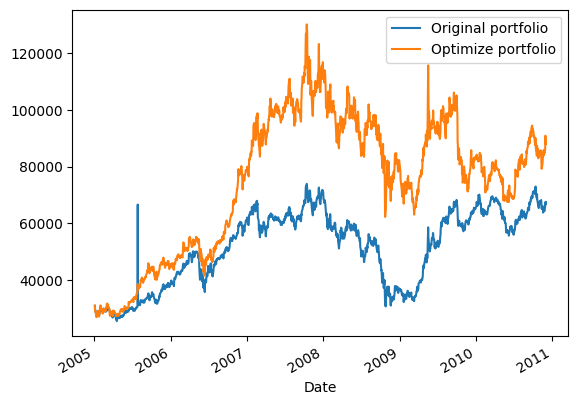

In [59]:
portfolio_df.plot()

In [60]:
### Now Let's How IT Was Performing on un seen Data
start_date = '2010-12-03'
end_date = '2020-12-03'
new_data = yf.download(list(initial_portfolio.Symbol.values), start=start_date, end=end_date)['Adj Close']

[*********************100%***********************]  3 of 3 completed


In [61]:
original_portfolio_value = calculate_portfolio_values(initial_portfolio,original_weight,new_data)
optimize_portfolio_value = calculate_portfolio_values(initial_portfolio,optimize_weight,new_data)

In [62]:
portfolio_df = pd.DataFrame(original_portfolio_value.Date) 
portfolio_df['Original portfolio'] = original_portfolio_value['Portfolio Value']
portfolio_df['Optimize portfolio'] = optimize_portfolio_value['Portfolio Value']
portfolio_df = portfolio_df.set_index('Date')

<Axes: xlabel='Date'>

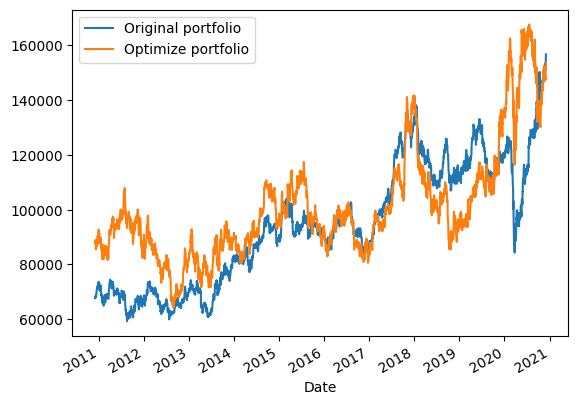

In [63]:
portfolio_df.plot()

In [64]:
portfolio_df

,Original portfolio,Optimize portfolio
Date,,
2010-12-03,67705.824707,87968.208939
2010-12-06,67917.598145,88005.856873
2010-12-07,68457.091797,88895.811264
2010-12-08,68495.880676,88645.689774
2010-12-09,67979.022400,86701.396866
...,...,...
2020-11-25,150304.299316,147361.271210
2020-11-26,153208.471069,148870.729370
2020-11-27,151744.762817,147193.700897
